In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_theme(style="darkgrid")

symulation_LEBR = np.load("powers/LEBR_powr.npy")
symulation_ILEBR = np.load("powers/ILEBR_powr.npy")
symulation_ILEBR2 = np.load("powers/ILEBR2_powr.npy")
symulation_ILEBR_star = np.load("powers/ILEBR_star_powr.npy")
symulation_ILEBR_star2 = np.load("powers/ILEBR_star2_powr.npy")

# ps1 = np.arange(0.495, 0.5+0.0005, 0.0005)
# ps2 = np.arange(0, 0.5+0.05, 0.05)
# ps2_star = np.arange(0, 0.5+0.01, 0.01)

ps1 = np.arange(0, 0.5, 0.1)
ps2 = np.arange(0, 0.5, 0.1)
ps2_star = np.arange(0, 0.5, 0.1)

symulation_p_LEBR = symulation_LEBR[:, :, 0]
symulation_p_ILEBR = symulation_ILEBR[:, :, 0]
symulation_p_ILEBR2 = symulation_ILEBR2[:, :, 0]
symulation_p_ILEBR_star = symulation_ILEBR_star[:, :, 0]
symulation_p_ILEBR_star2 = symulation_ILEBR_star2[:, :, 0]

symulation_n_LEBR = symulation_LEBR[:, :, 1]
symulation_n_ILEBR = symulation_ILEBR[:, :, 1]
symulation_n_ILEBR2 = symulation_ILEBR2[:, :, 1]
symulation_n_ILEBR_star = symulation_ILEBR_star[:, :, 1]
symulation_n_ILEBR_star2 = symulation_ILEBR_star2[:, :, 1]

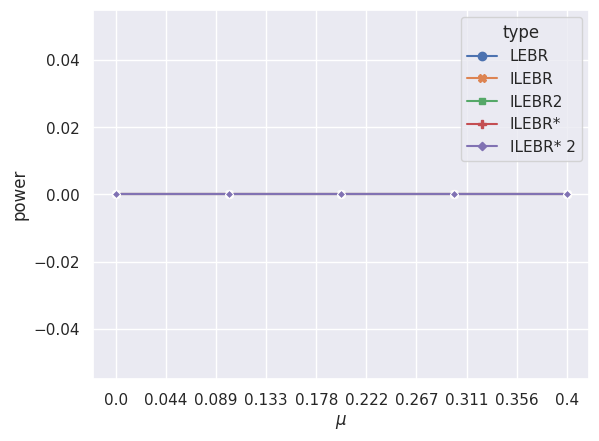

In [38]:
LEBR_df = pd.DataFrame((symulation_p_LEBR>0.5).T.astype(int))
LEBR_df.columns = ps1
LEBR_df = LEBR_df.assign(type = "LEBR")

ILEBR_df = pd.DataFrame((symulation_p_ILEBR>0.5).T.astype(int))
ILEBR_df.columns = ps1
ILEBR_df = ILEBR_df.assign(type = "ILEBR")

ILEBR2_df = pd.DataFrame((symulation_p_ILEBR2>0.5).T.astype(int))
ILEBR2_df.columns = ps1
ILEBR2_df = ILEBR2_df.assign(type = "ILEBR2")

ILEBR_star_df = pd.DataFrame((symulation_p_ILEBR_star>0.5).T.astype(int))
ILEBR_star_df.columns = ps1
ILEBR_star_df = ILEBR_star_df.assign(type = "ILEBR*")

ILEBR_star2_df = pd.DataFrame((symulation_p_ILEBR_star2>0.5).T.astype(int))
ILEBR_star2_df.columns = ps1
ILEBR_star2_df = ILEBR_star2_df.assign(type = "ILEBR* 2")

df = pd.concat([LEBR_df, ILEBR_df, ILEBR2_df, ILEBR_star_df, ILEBR_star2_df])
df = pd.melt(df, id_vars="type")
sns.lineplot(data=df, x="variable", y="value", hue="type", style="type", markers=True,
            dashes=False)
xs = np.linspace(min(ps1),max(ps1),10)
plt.xticks(xs,np.round(xs, 3))
plt.ylabel("power")
plt.xlabel("$\mu$")
plt.show()

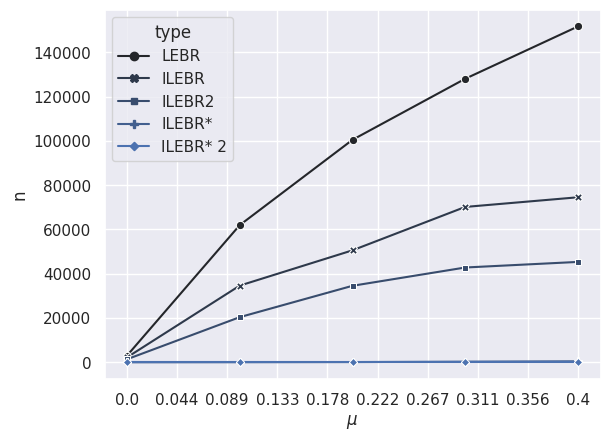

In [39]:

sns.set(style="darkgrid")

LEBR_n_df = pd.DataFrame(symulation_n_LEBR.T)
LEBR_n_df.columns = ps2
LEBR_n_df = LEBR_n_df.assign(type = "LEBR")

ILEBR_n_df = pd.DataFrame(symulation_n_ILEBR.T)
ILEBR_n_df.columns = ps2
ILEBR_n_df = ILEBR_n_df.assign(type = "ILEBR")

ILEBR2_n_df = pd.DataFrame(symulation_n_ILEBR2.T)
ILEBR2_n_df.columns = ps2
ILEBR2_n_df = ILEBR2_n_df.assign(type = "ILEBR2")

ILEBR_n_star_df = pd.DataFrame(symulation_n_ILEBR_star.T)
ILEBR_n_star_df.columns = ps2_star
ILEBR_n_star_df = ILEBR_n_star_df.assign(type = "ILEBR*")

ILEBR_n_star2_df = pd.DataFrame(symulation_p_ILEBR_star2.T)
ILEBR_n_star2_df.columns = ps2_star
ILEBR_n_star2_df = ILEBR_n_star2_df.assign(type = "ILEBR* 2")

df = pd.concat([LEBR_df, ILEBR_df, ILEBR2_df, ILEBR_star_df, ILEBR_star2_df])
df = pd.melt(df, id_vars="type")


df_n = pd.concat([LEBR_n_df, ILEBR_n_df, ILEBR2_n_df, ILEBR_n_star_df, ILEBR_n_star2_df])
df_n = pd.melt(df_n, id_vars="type")
sns.lineplot(data=df_n, x="variable", y="value", hue="type", style="type", markers=True,
            dashes=False, palette="dark:b")
xs = np.linspace(min(ps2),max(ps2),10)
plt.xticks(xs,np.round(xs, 3))
# plt.yscale("log")
plt.ylabel("n")
plt.xlabel("$\mu$")

plt.show()